### Logistic Regression

Problem Statement: Classify using Logistic Regression

Dataset --> pima-indians-diabetes_data.csv

Class No_Diabetes = 0 = N, Diabetes = 1 = P

In [1]:
#Loading the Required Library
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
#Loading The Dataset
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
diabetes = pd.read_csv("C:/Users/Akaash/Downloads/pima-indians-diabetes_data.csv",names = names)
diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Inference: We Have 8 input Variable and 1 Class Variable

In [3]:
#Shape of the data set
diabetes.shape

(768, 9)

In [4]:
#Checking For NA Value
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Inference: There are no NA Value Present

#### Building Logistic Regression Model

In [5]:
# Dividing our data into input and output variables 
X = diabetes.iloc[:,0:8]
Y = diabetes.iloc[:,8]

In [6]:
#Logistic regression and fit the model
classifier = LogisticRegression(max_iter = 400)
classifier.fit(X,Y)

LogisticRegression(max_iter=400)

In [7]:
#Predict for X dataset
y_pred = classifier.predict(X)
#Getting First 50 predicted
y_pred[0:50] 

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0], dtype=int64)

Inference: These are the class for Y Variable (Y_hat) / (Predicted Values)

In [8]:
#Probability
y_pred_prob = classifier.predict_proba(X)
y_pred_prob

array([[0.28056238, 0.71943762],
       [0.95070372, 0.04929628],
       [0.20741843, 0.79258157],
       ...,
       [0.82695209, 0.17304791],
       [0.71322384, 0.28677616],
       [0.92693568, 0.07306432]])

Inference: These are the Probability of Y Variable (Y_hat)/(Predicted Values)

In [9]:
#Creating Dataframe of Actual and Predicted values for Y, (Y,Y_hat)
y_pred_df= pd.DataFrame({'actual': Y,'predicted_prob': classifier.predict(X)})
y_pred_df

,actual,predicted_prob
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
763,0,0
764,0,0
765,0,0
766,1,0


Inference: This Give the Actual & Predicted values side by side

In [10]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[444  56]
 [112 156]]


Inference: The Diagonal value(444,156) are the Correctly Predicted Values i.e TN, TP

In [11]:
#Calculating Accuracy 
#TP+TN / TP + FP + FN + TN
((156+444) / (156 + 112 + 56 + 444))*100

78.125

Inference: The Final Accuracy of the Model is 78.12

In [12]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.58      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.77       768



#### ROC Curve

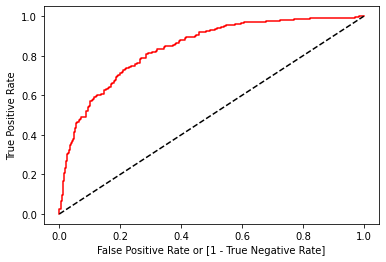

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [14]:
#Area Under the Curve
auc

0.7350447761194031

Inference: The Area Under the Curve For this Problem is 0.73

#### Cross Validation -- K-Folds

In [15]:
#Importing the Required Libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Creating K-Fold Instance
num_folds = 5
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)

#Predicting & Getting the Model Score with kfold
results = cross_val_score(classifier, X, Y, cv=kfold)

In [16]:
# Accuracy for Each K-Fold
results

array([0.79220779, 0.77272727, 0.78571429, 0.73856209, 0.78431373])

In [17]:
#Average of All k-fold Accuracy to get Final model Accuary
results.mean()*100.0

77.47050335285628